<div style="text-align: right"> <font color='Gray'> Sociofísica - 2023 </div>
<div style="text-align: right"> <font color='Gray'> Tarea N° 1 </div>
<div style="text-align: right"> <font color='Gray'> Sebastián Pulgares </div>


***

Tarea 1: Voter Model
-------------------------
"Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum."

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.animation import FuncAnimation
import os
import time

In [83]:
###Función###
def voter_model(N, iters, seed, num):
    start=time.time()
    for x in range(1,num+1):
        semilla= seed+(x-1)
        np.random.seed(semilla)
        Ci = np.random.choice([0, 1], [N,N])
        M = np.zeros(iters)
        path = './Simulacion/'+ str(x).zfill(3)
        if not os.path.exists(path):
            os.makedirs(path+'/data', exist_ok=True)   
            os.makedirs(path+'/Imagenes', exist_ok=True)
        with open(path+'/params.txt', 'w') as file:
            file.write( 'El tamaño del sistema es: '+str(N)+'x'+str(N))
            file.write('\n')
            file.write('Se realizaron '+str(iters)+' iteraciones')
            file.write('\n')
            file.write( 'La semilla utilizada fue: '+str(semilla))
            #file.write('\n')
        B= np.copy(Ci)
        for iter in range(iters):
            M[iter] = np.sum(B)
            if iter ==0:
                pass
            else:
                aux2=1
                while aux2%N !=0:
                    a, b = np.random.choice(N), np.random.choice(N)
                    vecino = np.random.choice([B[(a-1)%N, b], B[(a+1)%N, b], B[a, (b-1)%N], B[a, (b+1)%N]])
                    if B[a][b]==vecino:
                        pass
                    else:
                        B[a][b]=vecino
                    aux2+=1
            np.save(path + '/data/' + (str(iter).zfill(3)),B)
            plt.imshow(B, cmap='Greys', vmin=0, vmax=1)
            plt.savefig(path+'/Imagenes/'+str(iter).zfill(3) + '.png')
            if iter==iters-1:
                B_final=B
        plt.close('all')
        fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
        axes[0].imshow(Ci, cmap='Greys', vmin=0, vmax=1)
        axes[0].set_title('Estado Inicial')
        axes[1].imshow(B_final, cmap='Greys', vmin=0, vmax=1)
        axes[1].set_title('Estado Final')  
        axes[2].plot(M/N**2)    
        axes[2].set_ylim(0,1)
        axes[2].set_xlabel("Step")
        axes[2].set_ylabel("Consenso")
        axes[2].set_title("Consenso vs tiempo")
        axes[2].grid(True)
        plt.savefig(path+'/Resumen.png')
        plt.close('all')
    end=time.time()
    print("El tiempo de demora es "+str(end-start)+ " segundos")

El tiempo de demora es 35.26871681213379 segundos


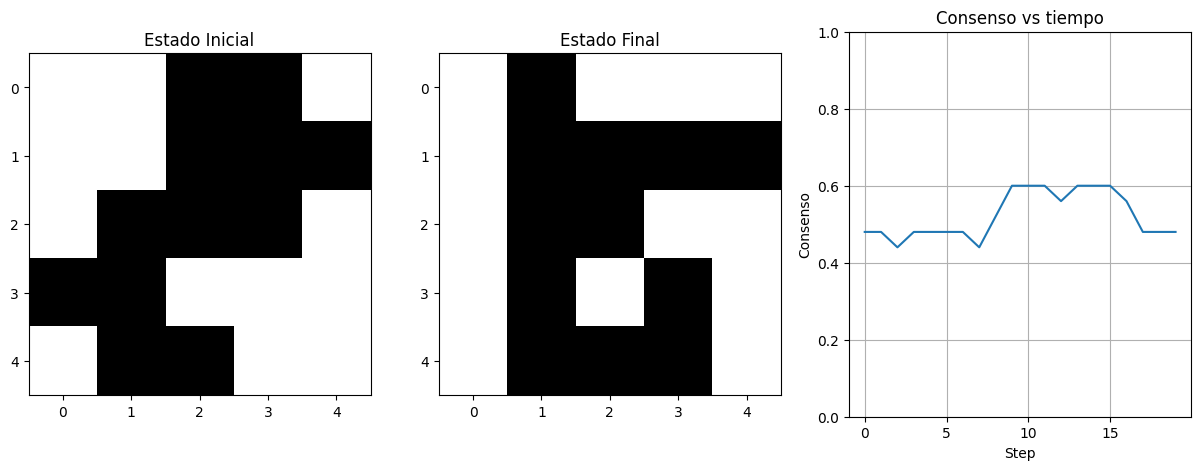

In [84]:
voter_model(5, 20, 1, 3)